# Explore here

In [1]:
# Step 1: Loading the dataset
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
# Storing the raw data in the ./data/raw folder
data.to_csv("../data/raw/data.csv", index = False)

In [3]:
# Step 2: Performing a full EDA
# Information about data types and non-null values
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(41188, 21)

In [4]:
# Dropping duplicates
data = data.drop_duplicates().reset_index(drop = True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Eliminating irrelevant information
data.drop(["day_of_week", "campaign", "pdays", "previous"], axis = 1, inplace = True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


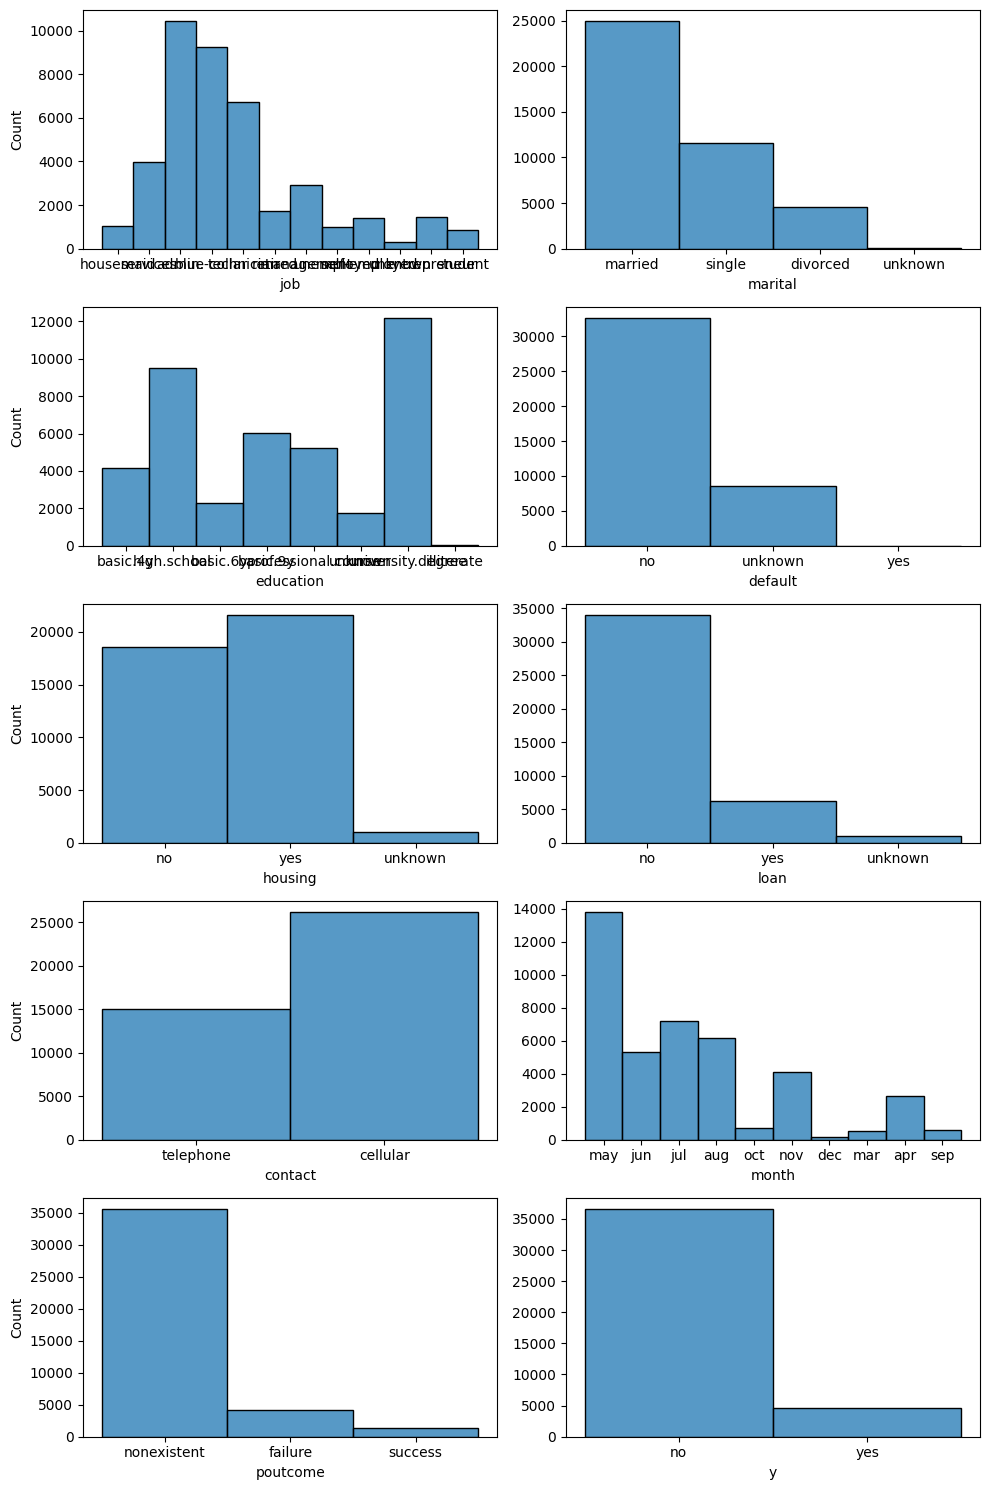

In [6]:
# Analysis of univariate (categorical) variables
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(5, 2, figsize = (10, 15))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = data, x = "job")
sns.histplot(ax = axis[0, 1], data = data, x = "marital").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = data, x = "education")
sns.histplot(ax = axis[1, 1], data = data, x = "default").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = data, x = "housing")
sns.histplot(ax = axis[2, 1], data = data, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = data, x = "contact")
sns.histplot(ax = axis[3, 1], data = data, x = "month").set(ylabel = None)
sns.histplot(ax = axis[4, 0], data = data, x = "poutcome")
sns.histplot(ax = axis[4, 1], data = data, x = "y").set(ylabel = None)


# Adjust the layout
plt.tight_layout()

# Show the  plot
plt.show()

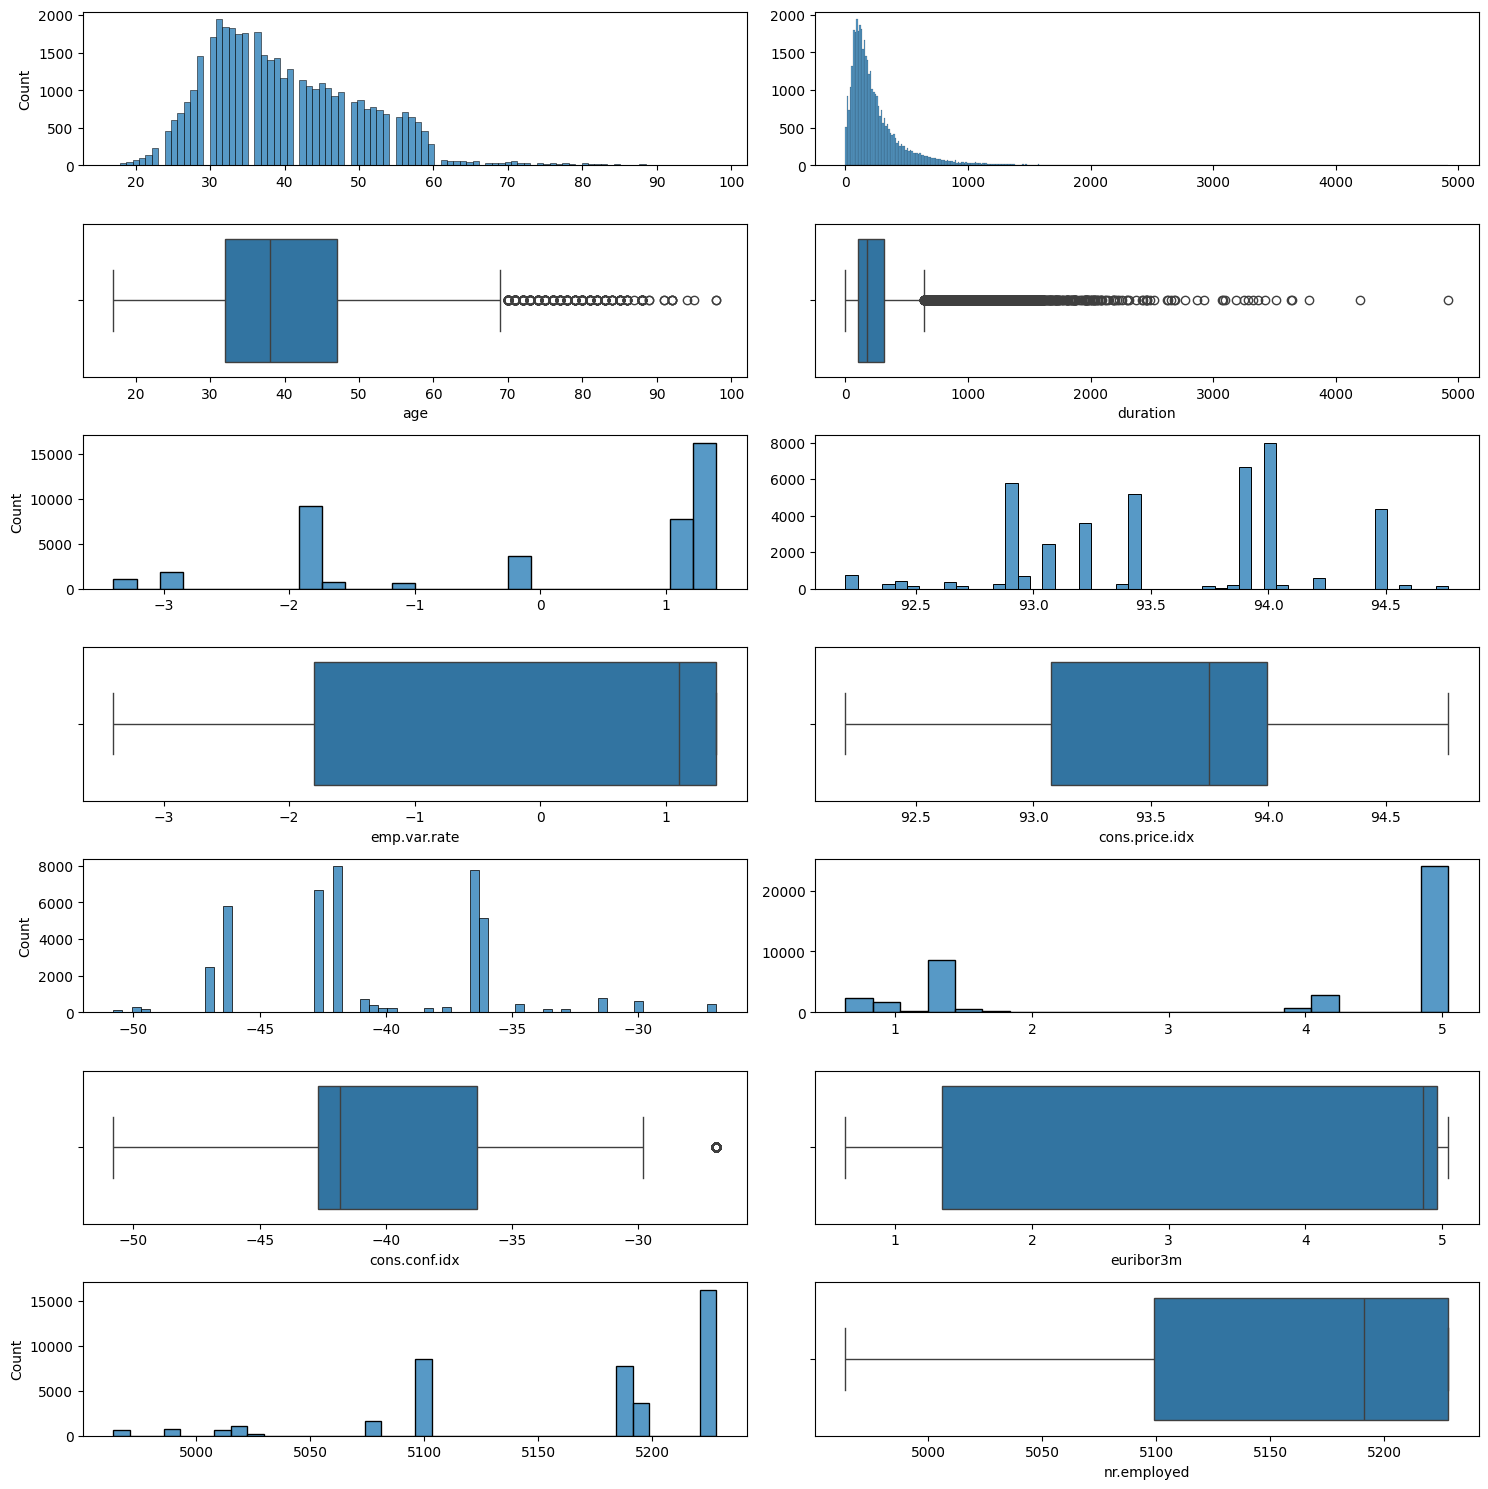

In [7]:
# Analysis on numeric variables
fig, axis = plt.subplots(7, 2, figsize = (15, 15))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "age")
sns.histplot(ax = axis[0, 1], data = data, x = "duration").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "duration")
sns.histplot(ax = axis[2, 0], data = data, x = "emp.var.rate").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "emp.var.rate")
sns.histplot(ax = axis[2, 1], data = data, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = data, x = "cons.price.idx")
sns.histplot(ax = axis[4, 0], data = data, x = "cons.conf.idx").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = data, x = "cons.conf.idx")
sns.histplot(ax = axis[4, 1], data = data, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = data, x = "euribor3m")
sns.histplot(ax = axis[6, 0], data = data, x = "nr.employed").set(xlabel = None)
sns.boxplot(ax = axis[6, 1], data = data, x = "nr.employed")


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
# Age
age_stats = data["age"].describe()
age_stats

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [9]:
age_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit = age_stats["75%"] + 1.5 * age_iqr
lower_limit = age_stats["25%"] - 1.5 * age_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(age_iqr, 2)}")

The upper and lower limits for finding outliers are 69.5 and 9.5, with an interquartile range of 15.0


In [10]:
data[data["age"] > 80]

,age,job,marital,education,default,housing,loan,contact,month,duration,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27792,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,48,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27794,88,retired,divorced,basic.4y,no,no,no,cellular,mar,266,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27797,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,796,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,96,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27802,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,126,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40938,81,retired,divorced,basic.4y,no,yes,no,cellular,oct,192,success,-1.1,94.601,-49.5,0.987,4963.6,no
40953,81,retired,divorced,basic.4y,no,yes,no,cellular,oct,158,failure,-1.1,94.601,-49.5,0.987,4963.6,no
40957,84,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,106,nonexistent,-1.1,94.601,-49.5,0.993,4963.6,no
40974,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,138,success,-1.1,94.601,-49.5,1.000,4963.6,no


In [11]:
# Duration
duration_stats = data["duration"].describe()
duration_stats

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [12]:
duration_iqr = duration_stats["75%"] - duration_stats["25%"]
upper_limit = duration_stats["75%"] + 1.5 * duration_iqr
lower_limit = duration_stats["25%"] - 1.5 * duration_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(duration_iqr, 2)}")

The upper and lower limits for finding outliers are 644.5 and -223.5, with an interquartile range of 217.0


In [13]:
data[data["duration"] > 4500]

,age,job,marital,education,default,housing,loan,contact,month,duration,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24084,33,technician,single,professional.course,no,yes,no,telephone,nov,4918,nonexistent,-0.1,93.2,-42.0,4.406,5195.8,no


In [14]:
data = data.drop(index=24091)

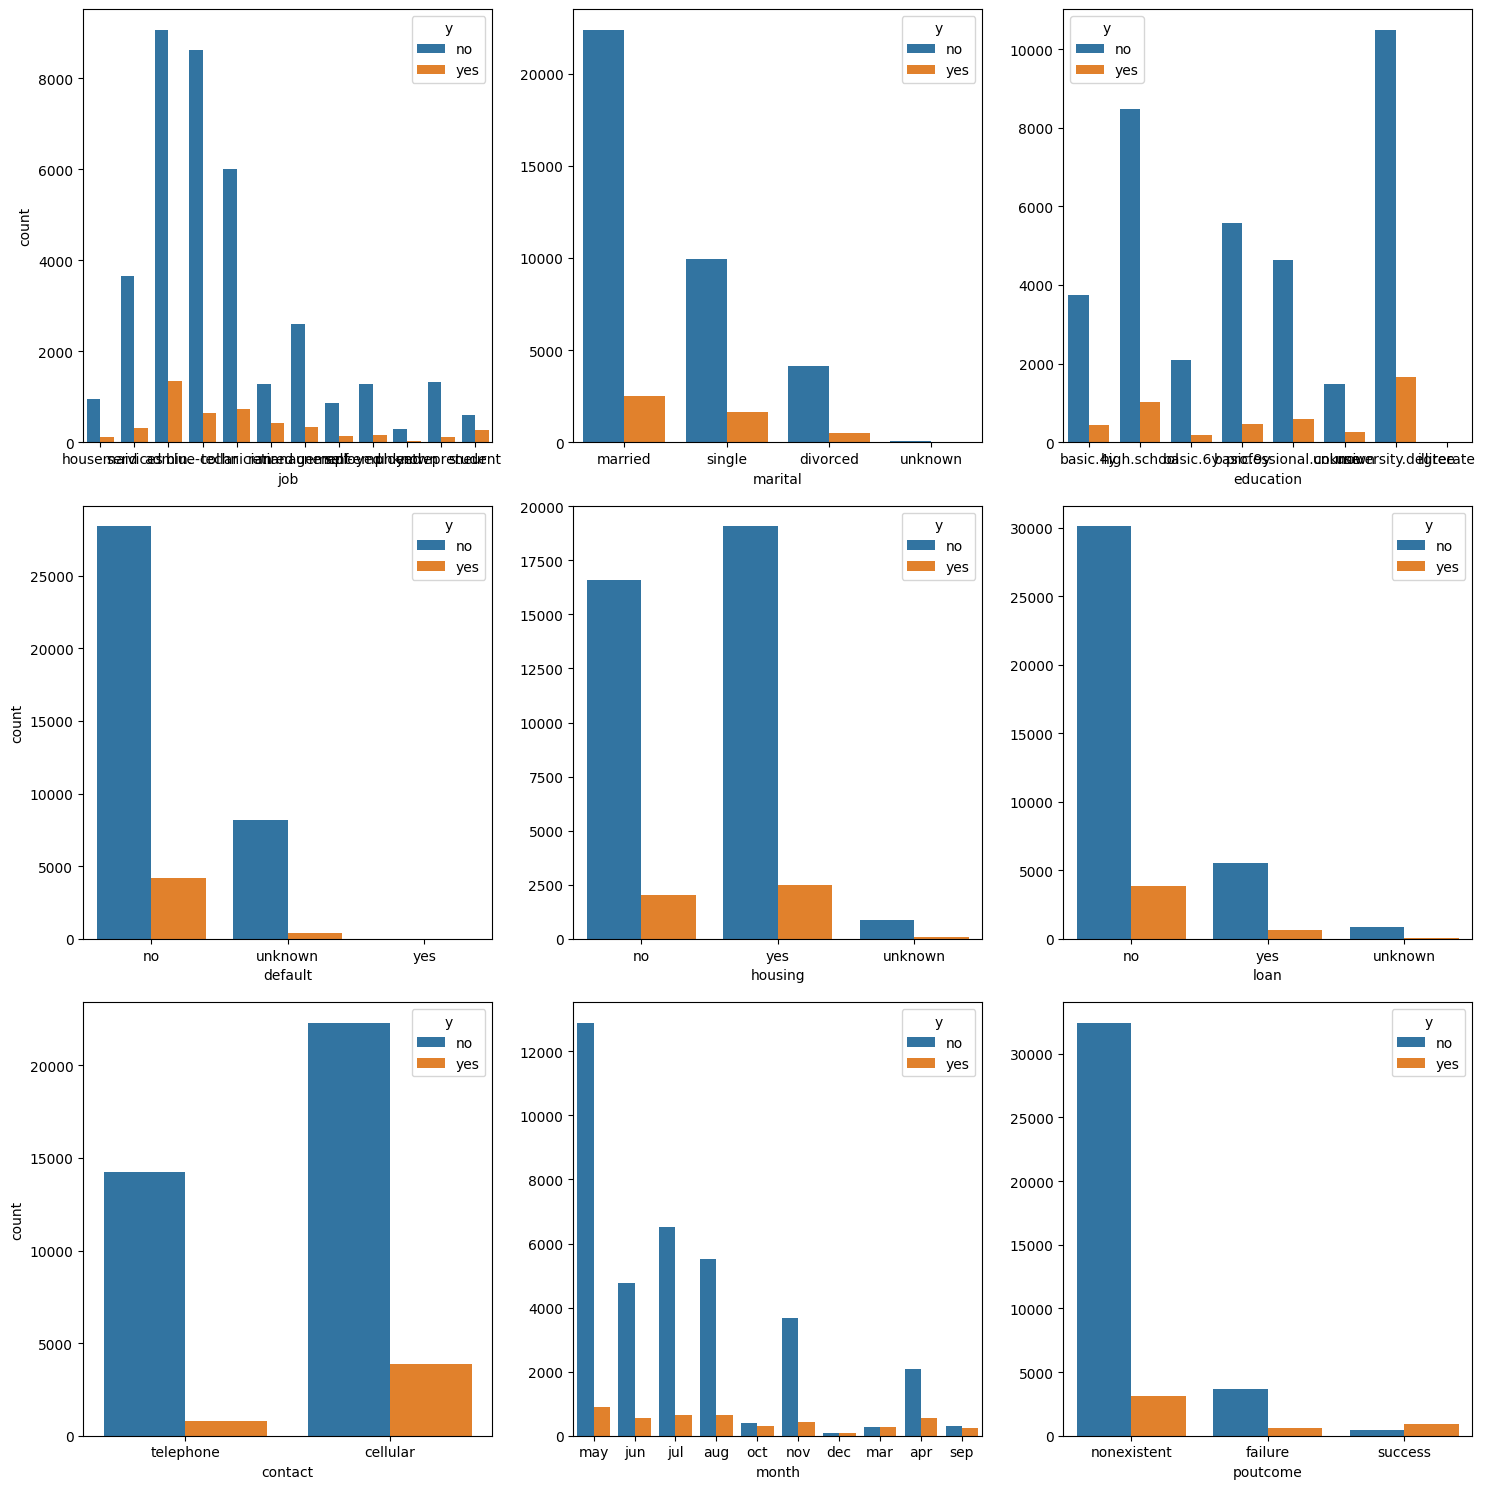

In [15]:
# Analysis of multivariate variables (categorical-categorical analysis)
fig, axis = plt.subplots(3, 3, figsize = (15, 15))

sns.countplot(ax = axis[0, 0], data = data, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = data, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = data, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = data, x = "default", hue = "y")
sns.countplot(ax = axis[1, 1], data = data, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = data, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 0], data = data, x = "contact", hue = "y")
sns.countplot(ax = axis[2, 1], data = data, x = "month", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2, 2], data = data, x = "poutcome", hue = "y").set(ylabel = None)

plt.tight_layout()

plt.show()

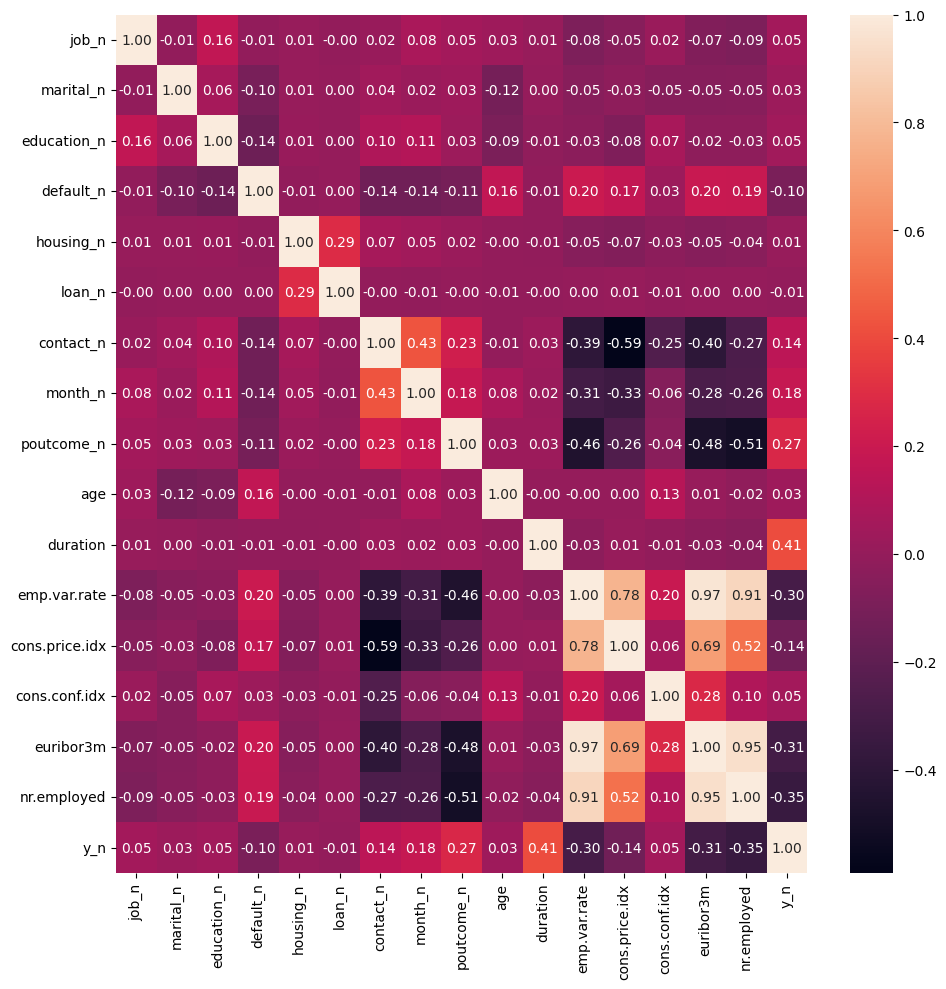

In [16]:
# Numerical-categorical analysis (complete)
# Factorizing (convert categorical values into numerical labels) values
data["job_n"] = pd.factorize(data["job"])[0]
data["marital_n"] = pd.factorize(data["marital"])[0]
data["education_n"] = pd.factorize(data["education"])[0]
data["default_n"] = pd.factorize(data["default"])[0]
data["housing_n"] = pd.factorize(data["housing"])[0]
data["loan_n"] = pd.factorize(data["loan"])[0]
data["contact_n"] = pd.factorize(data["contact"])[0]
data["month_n"] = pd.factorize(data["month"])[0]
data["poutcome_n"] = pd.factorize(data["poutcome"])[0]
data["y_n"] = pd.factorize(data["y"])[0]

num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "poutcome_n",
                 "age", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(data[num_variables].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [17]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
data_scal = pd.DataFrame(scal_features, index = data.index, columns = num_variables)
data_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,poutcome_n,age,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.481481,0.053070,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.493827,0.030297,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.246914,0.045954,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.283951,0.030704,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.481481,0.062424,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [18]:
# Feature selection
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split

# Dividing the dataset into training and test samples
X = data_scal.drop("y_n", axis = 1)
y = data_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,poutcome_n,duration,emp.var.rate,euribor3m,nr.employed
0,0.0,0.058154,1.000000,0.980503,1.000000
1,0.0,0.001627,1.000000,0.982544,1.000000
2,0.0,0.003660,0.333333,0.158694,0.512287
3,0.0,0.027450,0.937500,0.958059,0.859735
4,0.0,0.084181,1.000000,0.981637,1.000000


In [19]:
X_test_sel.head()

,poutcome_n,duration,emp.var.rate,euribor3m,nr.employed
0,0.0,0.051240,0.687500,0.767853,0.877883
1,0.0,0.015453,0.333333,0.139651,0.512287
2,0.0,0.017893,1.000000,0.981864,1.000000
3,0.5,0.037820,0.333333,0.150759,0.512287
4,0.0,0.057747,0.937500,0.957379,0.859735


In [20]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [21]:
# Building a multiple linear regression model
# Reading the processed dataset
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,poutcome_n,duration,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.058154,1.000000,0.980503,1.000000,0.0
1,0.0,0.001627,1.000000,0.982544,1.000000,0.0
2,0.0,0.003660,0.333333,0.158694,0.512287,0.0
3,0.0,0.027450,0.937500,0.958059,0.859735,0.0
4,0.0,0.084181,1.000000,0.981637,1.000000,0.0


In [22]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [23]:
# Initialization and training of the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Model prediction
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
# Using metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# Accuracy score
accuracy_score(y_test, y_pred)

0.9044323011536126

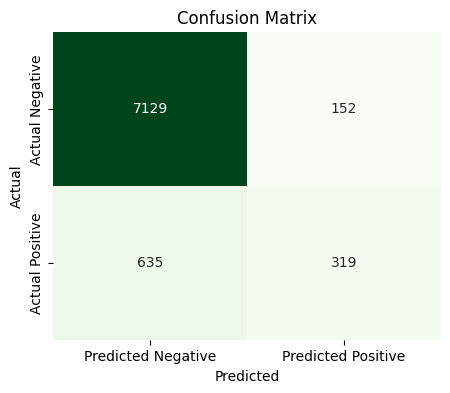

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Computing the confusion matrix
marketing_campaign = confusion_matrix(y_test, y_pred)

# Converting the confusion matrix to a DataFrame for easier visualization
cm_df = pd.DataFrame(marketing_campaign, 
                     index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])

# Ploting the confusion matrix
plt.figure(figsize=(5, 4)) 
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False, cmap='Greens')  # Adding a color map for better visual distinction
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Conclusion: of all the samples predicted as positive, 67% were actually positive

Precision: 0.6772823779193206


In [ ]:
# Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# Conclusion: of all the positive samples, 33% were correctly predicted as positive

Recall: 0.33438155136268344


In [29]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

# Conclusion: a low F1 score indicates that the model is not performing well in balancing precision and recall

F1 Score: 0.447719298245614


In [30]:
# Step 4: Optimizing the previous model
# Grid search
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [31]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [32]:
model_grid = LogisticRegression(penalty = "l2", C = 1, solver = "lbfgs")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9044323011536126

In [33]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))